# Exploration Notebook

## Specify Data Source

In [52]:
from config import *

In [53]:
dataset_path = DATA_PATH

In [54]:
hungry = dataset_path + 'hungry'

In [55]:
hungry

'../data/raw/donateacry_corpus_cleaned_and_updated_data/hungry'

## Load Data

### Check Contents of Data Sub Folders

In [56]:
import os
audio_files = os.listdir(hungry)
print('Number of audio files in hungry folder: ', len(audio_files))

Number of audio files in hungry folder:  382


In [57]:
burping = dataset_path + 'burping'
audio_files = os.listdir(hungry)
print('Number of audio files in burping folder: ', len(audio_files))

Number of audio files in burping folder:  382


### Load in an Audio Sample to Visualise

#### Load audio file

In [58]:

import librosa

audio_file = hungry + HUNGRY_TEST_SAMPLE
audio_data, sample_rate = librosa.load(audio_file, sr=None)

In [59]:
print('Audio data: ', audio_data)
print('Sampling rate: ', sample_rate)
print('Audio duration: ', len(audio_data)/sample_rate, 'seconds')


Audio data:  [0.         0.         0.         ... 0.02679443 0.09161377 0.074646  ]
Sampling rate:  8000
Audio duration:  6.84 seconds


#### Visualise Audio Waveform

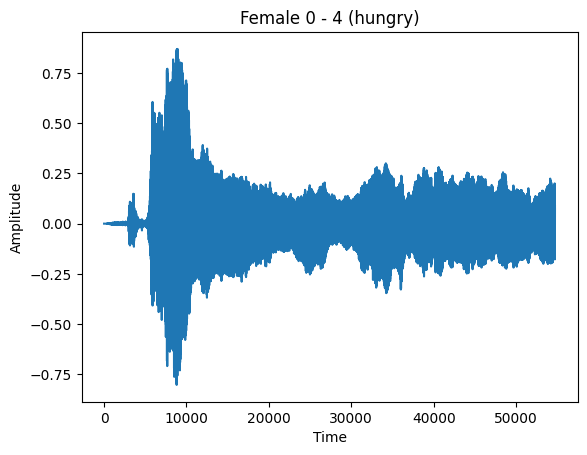

In [60]:
import matplotlib.pyplot as plt

plt.plot(audio_data)
plt.title('Female 0 - 4 (hungry)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Spectrogram to visualise Frequency Content Over Time

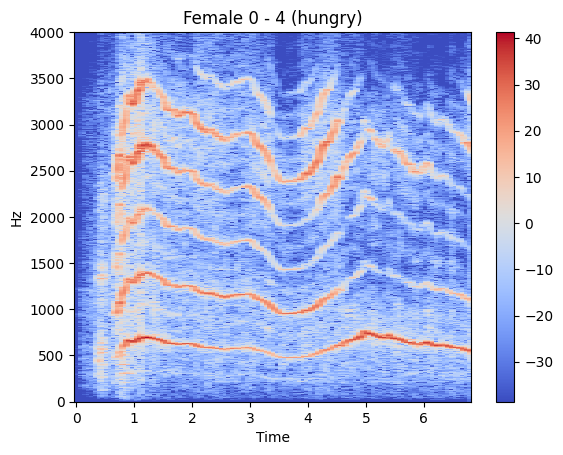

In [61]:
X = librosa.stft(audio_data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Female 0 - 4 (hungry)')
plt.show()


### Compare Two Waveforms from Same Category to Observe Similarities

#### Load Audio File From Same Sub Folder

In [62]:
audio_file2 = hungry + '/0D1AD73E-4C5E-45F3-85C4-9A3CB71E8856-1430742197-1.0-m-04-hu.wav'
y2, sample_rate2 = librosa.load(audio_file, sr=None)

##### Extract MFCCs for Both Audio Files

In [63]:
mfccs1 = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

mfccs2 = librosa.feature.mfcc(y=y2, sr=sample_rate2, n_mfcc=13)


#### Compute cosine similarity and compute Average Similarity

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(mfccs1.T, mfccs2.T)

average_similarity = similarity_matrix.mean()


In [65]:
print("Average Cosine Similarity:", average_similarity)
# An average cosine similarity close to 1 means that the two audio files are similar

Average Cosine Similarity: 0.8842284


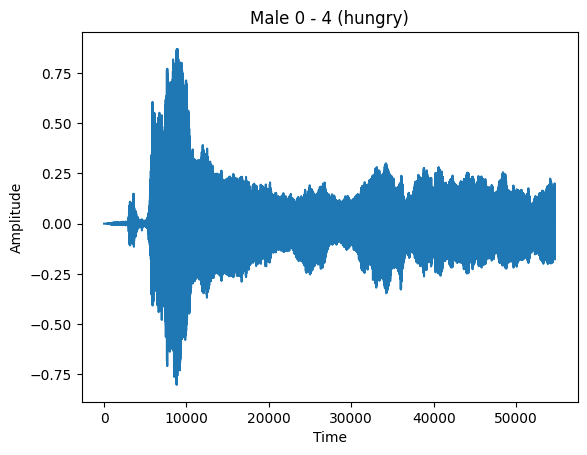

In [66]:
plt.plot(y2)
plt.title('Male 0 - 4 (hungry)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

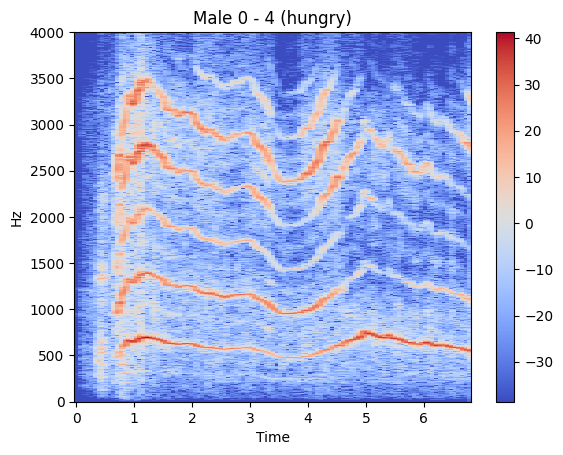

In [67]:
X = librosa.stft(y2)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate2, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Male 0 - 4 (hungry)')
plt.show()

#### Compare a Hungry cry to a Burping cry

In [68]:
burping = dataset_path + 'burping'
audio_file3 = burping + '/F24DE44B-762C-4149-AC92-96A5E57ED118-1430816949-1.0-m-04-bu.wav'
y3, sample_rate3 = librosa.load(audio_file3, sr=None)


In [69]:
mfccs3 = librosa.feature.mfcc(y=y3, sr=sample_rate3, n_mfcc=13)

In [70]:
similarity_matrix = cosine_similarity(mfccs1.T, mfccs3.T)

average_similarity2 = similarity_matrix.mean()

In [71]:
print("Average Cosine Similarity:", average_similarity2)
# An average cosine similarity close to 1 means that the two audio files are similar (in this case, they are not)

Average Cosine Similarity: 0.82843083


In [72]:
print(sample_rate, sample_rate2, sample_rate3)

8000 8000 8000


In [73]:

audio_file4 = burping + '/F24DE44B-762C-4149-AC92-96A5E57ED118-1430816949-1.0-m-04-bu.wav'
original_audio, original_sr = librosa.load(audio_file4, sr=None)

# Upsample the audio to the desired sampling rate
target_sr = 44100  # Example: desired sampling rate
resampled_audio = librosa.resample(original_audio, orig_sr=original_sr, target_sr=target_sr)


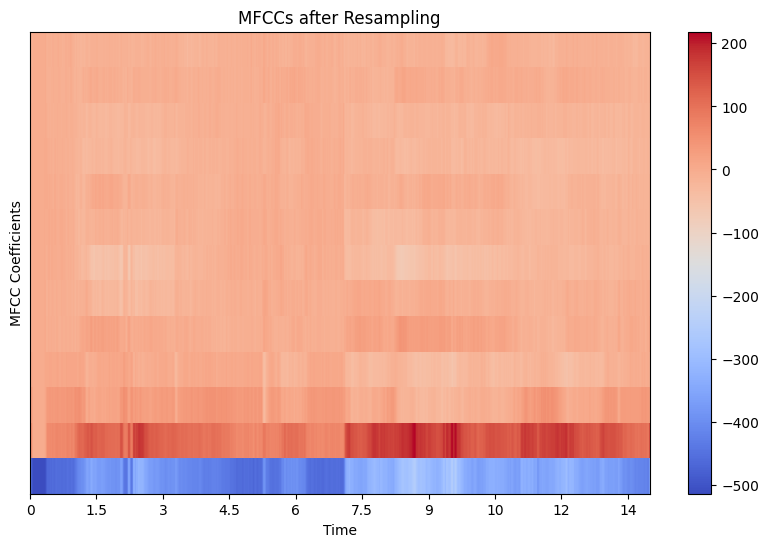

In [74]:
# Extract MFCCs from the resampled audio
mfccs = librosa.feature.mfcc(y=resampled_audio, sr=target_sr, n_mfcc=13)

# Visualize the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs after Resampling')
plt.ylabel('MFCC Coefficients')
plt.xlabel('Time')
plt.show()


# Data Cleaning and Preprocessing